In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Tec/7mo Semestre/Inteligencia Artificial I/Base de Datos Reto

Mounted at /content/drive
/content/drive/MyDrive/Tec/7mo Semestre/Inteligencia Artificial I/Base de Datos Reto


# Carga de las bases de datos

In [ ]:
df = pd.read_csv('501.csv')
df1 = pd.read_csv('502.csv')
df2 = pd.read_csv('503.csv')
df3 = pd.read_csv('504.csv')
df4 = pd.read_csv('505.csv')
df5 = pd.read_csv('506.csv')
df6 = pd.read_csv('507.csv')
df7 = pd.read_csv('508.csv')
df8 = pd.read_csv('509.csv')
df9 = pd.read_csv('510.csv')
df10 = pd.read_csv('511.csv')
df11 = pd.read_csv('512.csv')
df12 = pd.read_csv('513.csv')
df13 = pd.read_csv('514.csv')
df14 = pd.read_csv('515.csv')

In [ ]:
df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14])

#Exploración de Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1832560 entries, 0 to 153516
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   back_x     float64
 2   back_y     float64
 3   back_z     float64
 4   thigh_x    float64
 5   thigh_y    float64
 6   thigh_z    float64
 7   label      int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 125.8+ MB


In [ ]:
df.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [ ]:
df.isna().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [ ]:
df.columns

Index(['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y',
       'thigh_z', 'label'],
      dtype='object')

In [ ]:
df.dtypes

timestamp     object
back_x       float64
back_y       float64
back_z       float64
thigh_x      float64
thigh_y      float64
thigh_z      float64
label          int64
dtype: object

Text(0.5, 1.0, 'Observaciones de actividades')

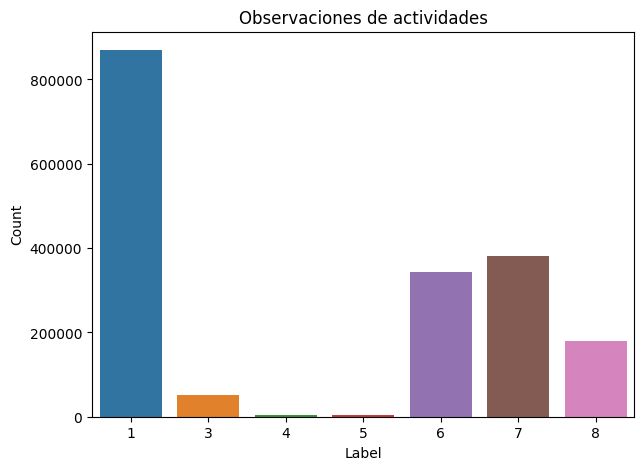

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='label')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title('Observaciones de actividades')

Gracias a esta grafica pudimo sdescubrir que nuestras muestras se encuentas desbalanceadas po rlo que previo a entrenar lso diferentes modelos deberemos utilizar una tecnica de balanceo de muestras

In [ ]:
correlacion = df.corr()

<ipython-input-35-c0854e3b5557>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


In [ ]:
alta_corr =np.where((correlacion>0.95)&(correlacion<1))
baja_corr =np.where((correlacion<-0.95)&(correlacion>-1))

In [ ]:
alta_corr

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
baja_corr

(array([], dtype=int64), array([], dtype=int64))

<ipython-input-39-0c57e6232ea7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap='magma',annot = True)


<Axes: >

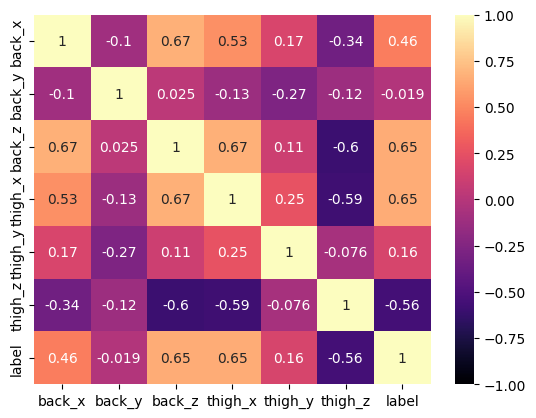

In [ ]:
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap='magma',annot = True)

Al analizar los resultados obtenidos a partir de las variables "alta_corr" y "baja_corr", así como examinar la gráfica de correlaciones, podemos concluir que no se evidencian correlaciones significativas entre las variables predictoras. Esta falta de correlación sugiere que las variables no están relacionadas linealmente entre sí, lo que implica que no será necesario estandarizar los datos para mitigar los efectos de diferentes escalas. Esto simplificará el proceso de modelado, ya que no se requerirá el escalado de variables, y el enfoque principal puede centrarse en la construcción y evaluación del modelo sin la necesidad de transformaciones adicionales.

In [ ]:
#Se verifica que no existan datos duplicados en el dataset
df[df.duplicated(keep=False)]

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label


No se encontraron datos duplicados en nuestra base de datos

In [ ]:
df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06
mean,-8.683814e-01,-3.178814e-02,2.244210e-02,-6.763959e-01,8.185066e-03,-3.858819e-01,3.940692e+00
std,2.756643e-01,1.556768e-01,4.279549e-01,5.596829e-01,2.707317e-01,5.087015e-01,2.912512e+00
min,-4.333252e+00,-2.031006e+00,-2.204834e+00,-7.942139e+00,-5.142578e+00,-7.593750e+00,1.000000e+00
25%,-9.909670e-01,-1.093750e-01,-2.692870e-01,-9.855960e-01,-1.132810e-01,-9.770510e-01,1.000000e+00
50%,-9.377440e-01,-1.855500e-02,-9.399400e-02,-9.357910e-01,-1.464800e-02,-1.906740e-01,3.000000e+00
75%,-8.344730e-01,5.761700e-02,3.078610e-01,-7.763700e-02,1.230470e-01,-3.174000e-03,7.000000e+00
max,3.630370e-01,1.576660e+00,1.179199e+00,3.395264e+00,5.725098e+00,3.953369e+00,8.000000e+00


Text(0.5, 1.0, 'back x')

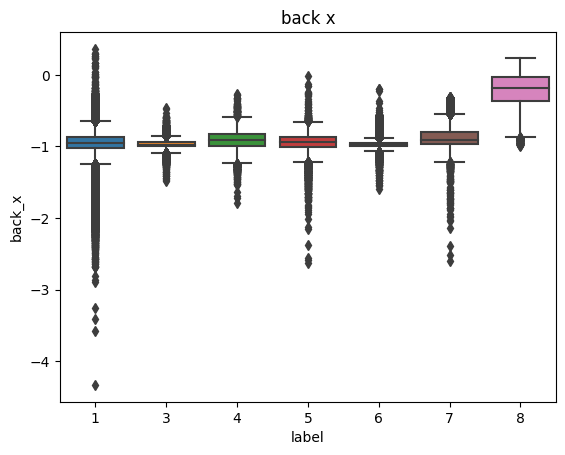

In [ ]:
sns.boxplot(x = df['label'], y = df['back_x']).set_title('back x')

Al observar detenidamente el gráfico, se hace evidente que se presenta una gran cantidad de datos, y esta acumulación puede ser atribuible a la propia naturaleza de los datos. En este contexto, es importante reconocer que la presencia de una gran cantidad de datos no necesariamente indica la existencia de valores atípicos o anómalos. En lugar de eliminar datos, es necesario considerar que esta densidad de datos podría ser un reflejo de la variabilidad inherente en el conjunto de datos y, por lo tanto, parte de la información valiosa que podría utilizarse para obtener un mejor entendimiento de los patrones subyacentes. Por lo tanto, en ausencia de señales claras de valores atípicos que afecten negativamente el análisis, es apropiado retener todos los datos disponibles para un análisis más completo y preciso.

# Aprendizaje Supervisado

In [ ]:
from sklearn.model_selection import StratifiedKFold #Con Validación cruzada estratificada nos aseguramos de que las muestras de ambas clases sean similares
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier                              # Diferentes librerías para los diferentes métodos de clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
%cd /content/drive/MyDrive/Tec/7mo Semestre/Inteligencia Artificial I/Base de Datos Reto
df = pd.read_csv('501.csv')
df1 = pd.read_csv('502.csv')
df2 = pd.read_csv('503.csv')
df3 = pd.read_csv('504.csv')
df4 = pd.read_csv('505.csv')
df5 = pd.read_csv('506.csv')
df6 = pd.read_csv('507.csv')
df7 = pd.read_csv('508.csv')
df8 = pd.read_csv('509.csv')
df9 = pd.read_csv('510.csv')
df10 = pd.read_csv('511.csv')
df11 = pd.read_csv('512.csv')
df12 = pd.read_csv('513.csv')
df13 = pd.read_csv('514.csv')
df14 = pd.read_csv('515.csv')
df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14])

/content/drive/MyDrive/Tec/7mo Semestre/Inteligencia Artificial I/Base de Datos Reto


## Submuestreo

In [ ]:
# SUbmuestreo: # Conteo de clases
conteo_clases = df['label'].value_counts()

# número deseado de muestras por clase
muestras_por_clase = 3726

# DataFrame vacío para almacenar el submuestreo
submuestreo = pd.DataFrame(columns=df.columns)

# iterar sobre cada clase y realizar el submuestreo
for clase, cantidad in conteo_clases.items():
    if cantidad > muestras_por_clase:
        subconjunto = df[df['label'] == clase].sample(muestras_por_clase)
    else:
        subconjunto = df[df['label'] == clase]
    submuestreo = pd.concat([submuestreo, subconjunto])


La realización de un submuestreo, también conocido como undersampling, es una técnica común utilizada en el procesamiento de datos desequilibrados, donde una o varias clases tienen muchas más observaciones que otras. En este caso, optamos por llevar a cabo un submuestreo para que todas las clases tengan un equilibrio de 3726 observaciones cada una. Es importante destacar que este número se eligió porque representa el recuento de observaciones de la clase con menos datos en nuestra base de datos original. Al igualar el número de observaciones en todas las clases, buscamos mitigar cualquier sesgo que pueda surgir debido a desequilibrios en los datos y permitir que el modelo de machine learning tenga una representación equitativa de todas las clases. Esto puede mejorar la capacidad del modelo para aprender patrones y tomar decisiones más precisas en cada clase, lo que a su vez puede llevar a resultados más confiables y justos en tareas de clasificación.

In [ ]:
x = submuestreo[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']]
y = submuestreo['label']

In [ ]:
clase_1 = np.count_nonzero(y == 1)
clase_3 = np.count_nonzero(y == 3)
clase_4 = np.count_nonzero(y == 4)
clase_5 = np.count_nonzero(y == 5)
clase_6 = np.count_nonzero(y == 6)
clase_7 = np.count_nonzero(y == 7)


print(f"Cantidad de instancias de clase 1: {clase_1}")
print(f"Cantidad de instancias de clase 3: {clase_3}")
print(f"Cantidad de instancias de clase 4: {clase_4}")
print(f"Cantidad de instancias de clase 5: {clase_5}")
print(f"Cantidad de instancias de clase 6: {clase_6}")
print(f"Cantidad de instancias de clase 7: {clase_7}")


prob_c1= clase_1 / (clase_1+clase_3+clase_4+clase_5+clase_6+clase_7)
prob_c3= clase_3 / (clase_1+clase_3+clase_4+clase_5+clase_6+clase_7)
prob_c4= clase_4 / (clase_1+clase_3+clase_4+clase_5+clase_6+clase_7)
prob_c5= clase_5 / (clase_1+clase_3+clase_4+clase_5+clase_6+clase_7)
prob_c6= clase_6 / (clase_1+clase_3+clase_4+clase_5+clase_6+clase_7)
prob_c7= clase_7 / (clase_1+clase_3+clase_4+clase_5+clase_6+clase_7)

prob = [prob_c1,prob_c3,prob_c4,prob_c5,prob_c6,prob_c7]

print(f"Probabilidad de pertenecer a la clase 1: {prob_c1}")
print(f"Probabilidad de pertenecer a la clase 3: {prob_c3}")
print(f"Probabilidad de pertenecer a la clase 4: {prob_c4}")
print(f"Probabilidad de pertenecer a la clase 5: {prob_c5}")
print(f"Probabilidad de pertenecer a la clase 6: {prob_c6}")
print(f"Probabilidad de pertenecer a la clase 7: {prob_c7}")

print(f"Probabilidad de pertenecer a alguna clase: {prob}")

Cantidad de instancias de clase 1: 3726
Cantidad de instancias de clase 3: 3726
Cantidad de instancias de clase 4: 3726
Cantidad de instancias de clase 5: 3726
Cantidad de instancias de clase 6: 3726
Cantidad de instancias de clase 7: 3726
Probabilidad de pertenecer a la clase 1: 0.16666666666666666
Probabilidad de pertenecer a la clase 3: 0.16666666666666666
Probabilidad de pertenecer a la clase 4: 0.16666666666666666
Probabilidad de pertenecer a la clase 5: 0.16666666666666666
Probabilidad de pertenecer a la clase 6: 0.16666666666666666
Probabilidad de pertenecer a la clase 7: 0.16666666666666666
Probabilidad de pertenecer a alguna clase: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


Verificamos que el submuestreo se haya realizado correctamente

In [ ]:
y.dtype

dtype('O')

In [ ]:
y = y.astype(int)

In [ ]:
y.dtype

dtype('int64')

In [ ]:
x  =np.array(x)
y  =np.array(y)

## SVC(kernel = 'linear')

In [ ]:
# SVM (Support Vector Machine)
# Linear SVM
print('---------------------- Linear-SVM ---------------------- ')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = SVC(kernel = 'linear',class_weight='balanced')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

---------------------- Linear-SVM ---------------------- 
              precision    recall  f1-score   support

           1       0.31      0.17      0.22      3726
           3       0.30      0.26      0.28      3726
           4       0.47      0.57      0.51      3726
           5       0.44      0.37      0.41      3726
           6       0.38      0.58      0.46      3726
           7       0.96      0.94      0.95      3726
           8       0.95      0.98      0.97      3726

    accuracy                           0.55     26082
   macro avg       0.54      0.55      0.54     26082
weighted avg       0.54      0.55      0.54     26082



## SVC(kernel = 'rbf')

In [ ]:
# El SVM con kernel RBF (Radial Basis Function)
print('---------------------- RBF-SVM ----------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = SVC(kernel = 'rbf', class_weight='balanced')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

---------------------- RBF-SVM ----------------------
              precision    recall  f1-score   support

           1       0.63      0.39      0.48      3726
           3       0.38      0.39      0.39      3726
           4       0.62      0.55      0.58      3726
           5       0.54      0.49      0.51      3726
           6       0.52      0.80      0.63      3726
           7       0.99      0.98      0.98      3726
           8       0.98      0.99      0.99      3726

    accuracy                           0.66     26082
   macro avg       0.66      0.66      0.65     26082
weighted avg       0.66      0.66      0.65     26082



## SVC(kernel = 'poly')

In [ ]:
# El SVM con kernel polinomial (Poly)
print('---------------------- Poly-SVM ----------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = SVC(kernel = 'poly', class_weight='balanced')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

---------------------- Poly-SVM ----------------------
              precision    recall  f1-score   support

           1       0.61      0.27      0.38      3726
           3       0.34      0.40      0.37      3726
           4       0.58      0.52      0.55      3726
           5       0.48      0.46      0.47      3726
           6       0.50      0.76      0.60      3726
           7       0.98      0.98      0.98      3726
           8       0.99      0.99      0.99      3726

    accuracy                           0.63     26082
   macro avg       0.64      0.63      0.62     26082
weighted avg       0.64      0.63      0.62     26082



## SVC (kernel = 'sigmoid')

In [ ]:
# El SVM con kernel sigmoide (Sigmoide)
print('---------------------- Sigmoide-SVM ----------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = SVC(kernel = 'sigmoid', class_weight='balanced')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

---------------------- Sigmoide-SVM ----------------------
              precision    recall  f1-score   support

           1       0.25      0.45      0.33      3726
           3       0.27      0.12      0.17      3726
           4       0.41      0.25      0.31      3726
           5       0.34      0.09      0.14      3726
           6       0.28      0.54      0.37      3726
           7       0.89      0.90      0.90      3726
           8       0.93      0.91      0.92      3726

    accuracy                           0.47     26082
   macro avg       0.48      0.47      0.45     26082
weighted avg       0.48      0.47      0.45     26082



## DecisionTreeClassifier

In [ ]:
# Arbol de decisión
print('------------------------  Decision tree ------------------------ ')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = DecisionTreeClassifier(class_weight='balanced')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

------------------------  Decision tree ------------------------ 
              precision    recall  f1-score   support

           1       0.51      0.50      0.50      3726
           3       0.45      0.44      0.44      3726
           4       0.61      0.62      0.62      3726
           5       0.52      0.51      0.52      3726
           6       0.70      0.70      0.70      3726
           7       0.99      0.99      0.99      3726
           8       1.00      1.00      1.00      3726

    accuracy                           0.68     26082
   macro avg       0.68      0.68      0.68     26082
weighted avg       0.68      0.68      0.68     26082



## LinearDiscriminantAnalysis

In [ ]:
# Análisis discriminante lineal
print('-------------------- Linear Discriminant Analysis --------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = LinearDiscriminantAnalysis()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

-------------------- Linear Discriminant Analysis --------------------
              precision    recall  f1-score   support

           1       0.24      0.18      0.21      3726
           3       0.31      0.17      0.22      3726
           4       0.43      0.58      0.49      3726
           5       0.41      0.27      0.33      3726
           6       0.38      0.61      0.47      3726
           7       0.90      0.92      0.91      3726
           8       0.93      0.97      0.95      3726

    accuracy                           0.53     26082
   macro avg       0.51      0.53      0.51     26082
weighted avg       0.51      0.53      0.51     26082



## GaussianNB

In [ ]:
# Naive Bayes
print('----------------------- GaussianNB ------------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = GaussianNB()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----------------------- GaussianNB ------------------------
              precision    recall  f1-score   support

           1       0.53      0.33      0.41      3726
           3       0.31      0.30      0.31      3726
           4       0.49      0.52      0.51      3726
           5       0.45      0.21      0.28      3726
           6       0.49      0.93      0.64      3726
           7       0.96      0.93      0.94      3726
           8       0.95      0.96      0.95      3726

    accuracy                           0.60     26082
   macro avg       0.60      0.60      0.58     26082
weighted avg       0.60      0.60      0.58     26082



## LogisticRegression

In [ ]:
# Regresión Logística)
print('---------------------- Loggistic Regression ----------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = LogisticRegression()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

---------------------- Loggistic Regression ----------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           1       0.24      0.17      0.20      3726
           3       0.30      0.20      0.24      3726
           4       0.45      0.61      0.52      3726
           5       0.42      0.31      0.36      3726
           6       0.39      0.58      0.46      3726
           7       0.94      0.97      0.96      3726
           8       0.97      0.98      0.97      3726

    accuracy                           0.54     26082
   macro avg       0.53      0.54      0.53     26082
weighted avg       0.53      0.54      0.53     26082



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNeighborsClassifier

In [ ]:
# KNN K vecinos más cercanos
print('------------------------ KNN ------------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = KNeighborsClassifier(n_neighbors=7)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

------------------------ KNN ------------------------
              precision    recall  f1-score   support

           1       0.65      0.55      0.59      3726
           3       0.51      0.53      0.52      3726
           4       0.72      0.76      0.74      3726
           5       0.68      0.59      0.63      3726
           6       0.68      0.82      0.75      3726
           7       0.99      1.00      0.99      3726
           8       1.00      1.00      1.00      3726

    accuracy                           0.75     26082
   macro avg       0.75      0.75      0.75     26082
weighted avg       0.75      0.75      0.75     26082



## Busqueda de mejores hiperparametros (KNeighborsClassifier)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a sintonizar
param_grid = {
    'n_neighbors': np.arange(1,100),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'leaf_size': [2,5,8,10,12,15,18,20,23,25,28,30],
    'p': [1, 2],  # Para la métrica de distancia Minkowski (1=Manhattan, 2=Euclidiana)
    'metric': ['minkowski'],  # Métrica de distancia
    'n_jobs': [-1]  # Usar todos los núcleos de CPU disponibles
}

# Crear un modelo KNN
model = KNeighborsClassifier()

# Configurar la búsqueda en la cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# Ajustar el modelo a los datos
grid_search.fit(x, y)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

print(f"Mejores parametros: {best_params}")

Se corrió en otro ordenador, para aprovechar tiempos y trabajar en paralelo debido al amplio desgaste computacional, los resultados fueron:


Mejores parametros: {'algorithm': 'auto', 'leaf_size': 2, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}

##  KNeighborsClassifier con hiperparametros optimizados

In [ ]:
# KNN K vecinos más cercanos
print('------------------------ KNN ------------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = KNeighborsClassifier(algorithm = 'auto', leaf_size = 2, metric = 'minkowski', n_jobs = -1, n_neighbors = 13, p = 1, weights = 'distance')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

------------------------ KNN ------------------------
              precision    recall  f1-score   support

           1       0.69      0.52      0.59      3726
           3       0.55      0.52      0.53      3726
           4       0.72      0.77      0.74      3726
           5       0.67      0.60      0.63      3726
           6       0.66      0.88      0.76      3726
           7       0.99      1.00      0.99      3726
           8       1.00      1.00      1.00      3726

    accuracy                           0.75     26082
   macro avg       0.75      0.75      0.75     26082
weighted avg       0.75      0.75      0.75     26082



## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
print('----------------------- RandonForest ------------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = RandomForestClassifier()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----------------------- RandonForest ------------------------
              precision    recall  f1-score   support

           1       0.65      0.62      0.63      3726
           3       0.56      0.60      0.58      3726
           4       0.73      0.75      0.74      3726
           5       0.67      0.61      0.64      3726
           6       0.78      0.82      0.80      3726
           7       1.00      1.00      1.00      3726
           8       1.00      1.00      1.00      3726

    accuracy                           0.77     26082
   macro avg       0.77      0.77      0.77     26082
weighted avg       0.77      0.77      0.77     26082



## Busqueda de mejores hiperparametros (RandomForestClassifier)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define los hiperparámetros que deseas optimizar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crea un clasificador Random Forest
rf_classifier = RandomForestClassifier()

# Crea un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Realiza la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(x, y)

# Imprime los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrena un modelo con los mejores hiperparámetros en todos los datos de entrenamiento
best_rf_classifier = RandomForestClassifier( **best_params)
best_rf_classifier.fit(x, y)

# Evalúa el modelo en los datos de prueba
accuracy = best_rf_classifier.score(x, y)
print("Exactitud en datos de prueba:", accuracy)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Exactitud en datos de prueba: 1.0


## RandomForestClassifier con hiperparametros optimizados

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
print('----------------------- RandonForest ------------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = RandomForestClassifier(bootstrap = True, max_depth = 50, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----------------------- RandonForest ------------------------
              precision    recall  f1-score   support

           1       0.65      0.61      0.63      3726
           3       0.56      0.60      0.58      3726
           4       0.74      0.76      0.75      3726
           5       0.68      0.63      0.65      3726
           6       0.78      0.82      0.80      3726
           7       1.00      1.00      1.00      3726
           8       1.00      1.00      1.00      3726

    accuracy                           0.77     26082
   macro avg       0.77      0.77      0.77     26082
weighted avg       0.77      0.77      0.77     26082



 ## MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report

clf = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=20000)
clf.fit(x, y)

# Evaluar con validación cruzada

y_pred = cross_val_predict(MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20),
max_iter=20000), x, y)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.54      0.56      3726
           3       0.48      0.55      0.51      3726
           4       0.57      0.49      0.53      3726
           5       0.51      0.48      0.49      3726
           6       0.70      0.80      0.75      3726
           7       0.98      0.99      0.99      3726
           8       1.00      1.00      1.00      3726

    accuracy                           0.69     26082
   macro avg       0.69      0.69      0.69     26082
weighted avg       0.69      0.69      0.69     26082



## tf.keras.Sequential

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)


# Define el modelo de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),
    tf.keras.layers.Dense(32768, activation='relu'),
    tf.keras.layers.Dense(1634, activation='relu'),
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrena el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evalúa el modelo en datos de prueba
accuracy = model.evaluate(X_test, y_test)[1]
print("Exactitud en datos de prueba:", accuracy)

Epoch 1/10
326/326 [==============================] - 520s 2s/step - loss: nan - accuracy: 0.0504 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
326/326 [==============================] - 518s 2s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
326/326 [==============================] - 541s 2s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
326/326 [==============================] - 534s 2s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
326/326 [==============================] - 488s 1s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
326/326 [==============================] - 461s 1s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
326/326 [==============================] - 457s 1s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 

## AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
# Random Forest
print('----------------------- AdaBoost Classifier ------------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = AdaBoostClassifier(RandomForestClassifier(bootstrap = True, max_depth = 50, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500),n_estimators=500)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----------------------- AdaBoost Classifier ------------------------
              precision    recall  f1-score   support

           1       0.67      0.62      0.65      3726
           3       0.57      0.62      0.60      3726
           4       0.74      0.76      0.75      3726
           5       0.68      0.62      0.65      3726
           6       0.80      0.83      0.81      3726
           7       0.99      1.00      1.00      3726
           8       1.00      1.00      1.00      3726

    accuracy                           0.78     26082
   macro avg       0.78      0.78      0.78     26082
weighted avg       0.78      0.78      0.78     26082



In [ ]:
adaboost_classifier = AdaBoostClassifier(RandomForestClassifier(bootstrap = True, max_depth = 50, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500))

# Definir un rango de hiperparámetros para buscar
param_dist = {
    'n_estimators': range(50, 201, 10),
    'learning_rate': np.linspace(0.01, 1.0, 100),
}

# Realizar la búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(adaboost_classifier, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)

# Entrenar el modelo con la búsqueda aleatoria de hiperparámetros
random_search.fit(x, y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

Mejores hiperparámetros encontrados:
{'n_estimators': 200, 'learning_rate': 0.65}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
# Random Forest
print('----------------------- AdaBoost Classifier (Hiperparametros)------------------------')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
  x_train = x[train_index, :]
  y_train = y[train_index]
  x_test = x[test_index, :]
  y_test = y[test_index]
  clf = AdaBoostClassifier(RandomForestClassifier(bootstrap = True, max_depth = 50, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500),n_estimators = 200, learning_rate = 0.65)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----------------------- AdaBoost Classifier ------------------------
              precision    recall  f1-score   support

           1       0.67      0.63      0.65      3726
           3       0.57      0.62      0.59      3726
           4       0.74      0.76      0.75      3726
           5       0.69      0.62      0.66      3726
           6       0.79      0.83      0.81      3726
           7       0.99      1.00      1.00      3726
           8       1.00      1.00      1.00      3726

    accuracy                           0.78     26082
   macro avg       0.78      0.78      0.78     26082
weighted avg       0.78      0.78      0.78     26082



## Número óptimo de características utilizando un método tipo Filter.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = AdaBoostClassifier(RandomForestClassifier(bootstrap = True, max_depth = 50, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500),n_estimators = 200, learning_rate = 0.65)
        fselection_cv = SelectKBest(f_classif, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear',class_weight='balanced')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

----- Optimal selection of number of features -----
---- n features = 1


Se realizo el número óptimo de características utilizando un método tipo Filter pero al correr el codigo google colab interrumpio la ejecución porque se usó toda la RAM disponible. Sin embargo al tener pocas varaibles predictoras no es fundamental buscar reducir el numero de carateristicas.

#Modelo de producción

In [ ]:
#Modelo Producción
print("----- Production model -----")
  clf = AdaBoostClassifier(RandomForestClassifier(bootstrap = True, max_depth = 50, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500),n_estimators = 200, learning_rate = 0.65)
  y = clf.predict(x)
  print(y)

# Graficas por actividad y sensor

In [ ]:
#Alcelerometro back
labels = df['label']
points = df[["back_x", "back_y", "back_z"]]

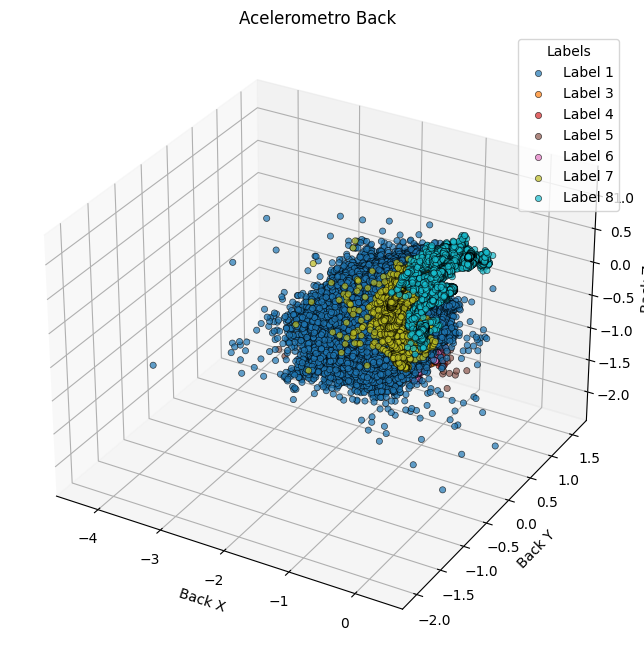

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Crear una figura más grande
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir colores para cada etiqueta única de forma más diferenciable
unique_labels = sorted(labels.unique())  # Ordenar etiquetas
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

# Dibujar puntos para cada etiqueta con su color correspondiente
for i, label in enumerate(unique_labels):
    mask = labels == label
    ax.scatter(
        points.loc[mask, 'back_x'],
        points.loc[mask, 'back_y'],
        points.loc[mask, 'back_z'],
        c=[colors[i]],
        label=f'Label {label}',
        marker='o',
        alpha=0.7,  # Transparencia
        edgecolors='black',  # Contorno negro
        linewidths=0.5,  # Ancho del contorno
    )

# Agregar leyenda con etiquetas ordenadas
ax.legend(title="Labels")

# Establecer etiquetas de los ejes
ax.set_xlabel('Back X')
ax.set_ylabel('Back Y')
ax.set_zlabel('Back Z')
plt.title('Acelerometro Back')

# Mostrar el gráfico
plt.show()


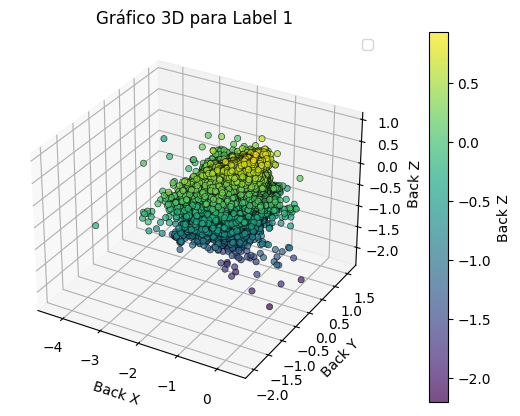

In [ ]:
# Filtrar el DataFrame para obtener solo las filas donde 'label' es igual a 1
filtered_df = df[df['label'] == 1]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Establecer una colormap basada en 'back_z'
cmap = plt.get_cmap('viridis')

# Normalizar 'back_z' para asignar colores
norm = plt.Normalize(filtered_df['back_z'].min(), filtered_df['back_z'].max())

# Trazar un gráfico 3D con 'back_x', 'back_y' y 'back_z', y colores basados en 'back_z'
scatter = ax.scatter(
    filtered_df['back_x'],
    filtered_df['back_y'],
    filtered_df['back_z'],
    c=filtered_df['back_z'],
    cmap=cmap,
    norm=norm,
    marker='o',
    alpha=0.7,  # Transparencia
    edgecolors='black',  # Contorno negro
    linewidths=0.5,  # Ancho del contorno
)

# Añadir una barra de colores
cb = plt.colorbar(scatter, ax=ax, pad=0.1)
cb.set_label('Back Z')

# Añadir etiquetas y leyenda
ax.set_xlabel('Back X')
ax.set_ylabel('Back Y')
ax.set_zlabel('Back Z')
ax.legend()
ax.set_title('Gráfico 3D para Label 1 (Walking)')

# Mostrar el gráfico
plt.show()

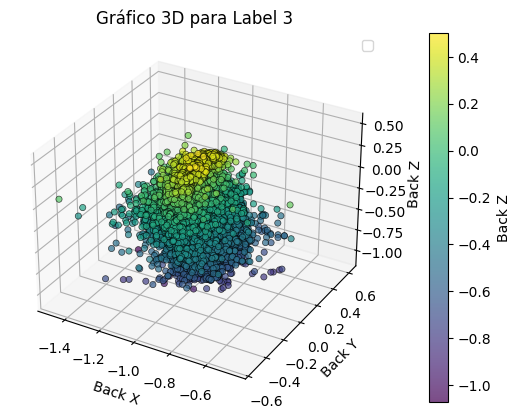

In [ ]:
# Filtrar el DataFrame para obtener solo las filas donde 'label' es igual a 1
filtered_df = df[df['label'] == 3]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Establecer una colormap basada en 'back_z'
cmap = plt.get_cmap('viridis')

# Normalizar 'back_z' para asignar colores
norm = plt.Normalize(filtered_df['back_z'].min(), filtered_df['back_z'].max())

# Trazar un gráfico 3D con 'back_x', 'back_y' y 'back_z', y colores basados en 'back_z'
scatter = ax.scatter(
    filtered_df['back_x'],
    filtered_df['back_y'],
    filtered_df['back_z'],
    c=filtered_df['back_z'],
    cmap=cmap,
    norm=norm,
    marker='o',
    alpha=0.7,  # Transparencia
    edgecolors='black',  # Contorno negro
    linewidths=0.5,  # Ancho del contorno
)

# Añadir una barra de colores
cb = plt.colorbar(scatter, ax=ax, pad=0.1)
cb.set_label('Back Z')

# Añadir etiquetas y leyenda
ax.set_xlabel('Back X')
ax.set_ylabel('Back Y')
ax.set_zlabel('Back Z')
ax.legend()
ax.set_title('Gráfico 3D para Label 3 (Shuffling)')

# Mostrar el gráfico
plt.show()

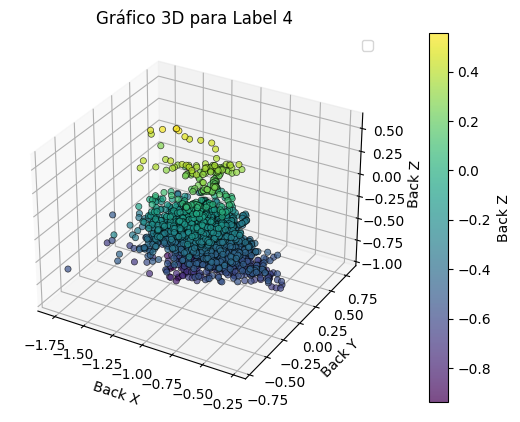

In [ ]:
# Filtrar el DataFrame para obtener solo las filas donde 'label' es igual a 1
filtered_df = df[df['label'] == 4]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Establecer una colormap basada en 'back_z'
cmap = plt.get_cmap('viridis')

# Normalizar 'back_z' para asignar colores
norm = plt.Normalize(filtered_df['back_z'].min(), filtered_df['back_z'].max())

# Trazar un gráfico 3D con 'back_x', 'back_y' y 'back_z', y colores basados en 'back_z'
scatter = ax.scatter(
    filtered_df['back_x'],
    filtered_df['back_y'],
    filtered_df['back_z'],
    c=filtered_df['back_z'],
    cmap=cmap,
    norm=norm,
    marker='o',
    alpha=0.7,  # Transparencia
    edgecolors='black',  # Contorno negro
    linewidths=0.5,  # Ancho del contorno
)

# Añadir una barra de colores
cb = plt.colorbar(scatter, ax=ax, pad=0.1)
cb.set_label('Back Z')

# Añadir etiquetas y leyenda
ax.set_xlabel('Back X')
ax.set_ylabel('Back Y')
ax.set_zlabel('Back Z')
ax.legend()
ax.set_title('Gráfico 3D para Label 4 (Stairs (ascending))')

# Mostrar el gráfico
plt.show()

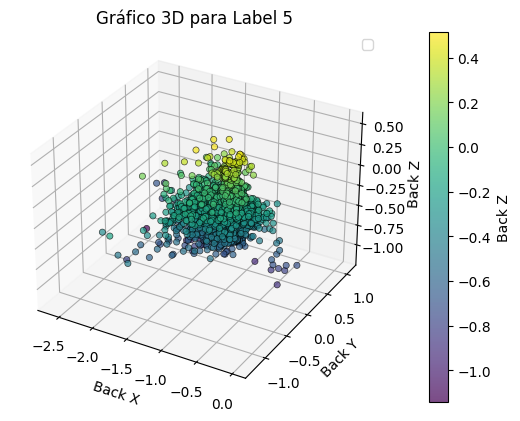

In [ ]:
# Filtrar el DataFrame para obtener solo las filas donde 'label' es igual a 1
filtered_df = df[df['label'] == 5]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Establecer una colormap basada en 'back_z'
cmap = plt.get_cmap('viridis')

# Normalizar 'back_z' para asignar colores
norm = plt.Normalize(filtered_df['back_z'].min(), filtered_df['back_z'].max())

# Trazar un gráfico 3D con 'back_x', 'back_y' y 'back_z', y colores basados en 'back_z'
scatter = ax.scatter(
    filtered_df['back_x'],
    filtered_df['back_y'],
    filtered_df['back_z'],
    c=filtered_df['back_z'],
    cmap=cmap,
    norm=norm,
    marker='o',
    alpha=0.7,  # Transparencia
    edgecolors='black',  # Contorno negro
    linewidths=0.5,  # Ancho del contorno
)

# Añadir una barra de colores
cb = plt.colorbar(scatter, ax=ax, pad=0.1)
cb.set_label('Back Z')

# Añadir etiquetas y leyenda
ax.set_xlabel('Back X')
ax.set_ylabel('Back Y')
ax.set_zlabel('Back Z')
ax.legend()
ax.set_title('Gráfico 3D para Label 5  (Stairs (descending))')

# Mostrar el gráfico
plt.show()

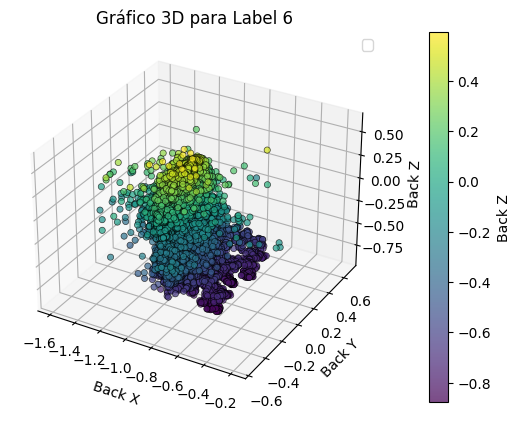

In [ ]:

# Filtrar el DataFrame para obtener solo las filas donde 'label' es igual a 1
filtered_df = df[df['label'] == 6]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Establecer una colormap basada en 'back_z'
cmap = plt.get_cmap('viridis')

# Normalizar 'back_z' para asignar colores
norm = plt.Normalize(filtered_df['back_z'].min(), filtered_df['back_z'].max())

# Trazar un gráfico 3D con 'back_x', 'back_y' y 'back_z', y colores basados en 'back_z'
scatter = ax.scatter(
    filtered_df['back_x'],
    filtered_df['back_y'],
    filtered_df['back_z'],
    c=filtered_df['back_z'],
    cmap=cmap,
    norm=norm,
    marker='o',
    alpha=0.7,  # Transparencia
    edgecolors='black',  # Contorno negro
    linewidths=0.5,  # Ancho del contorno
)

# Añadir una barra de colores
cb = plt.colorbar(scatter, ax=ax, pad=0.1)
cb.set_label('Back Z')

# Añadir etiquetas y leyenda
ax.set_xlabel('Back X')
ax.set_ylabel('Back Y')
ax.set_zlabel('Back Z')
ax.legend()
ax.set_title('Gráfico 3D para Label 6 (Standing)')

# Mostrar el gráfico
plt.show()

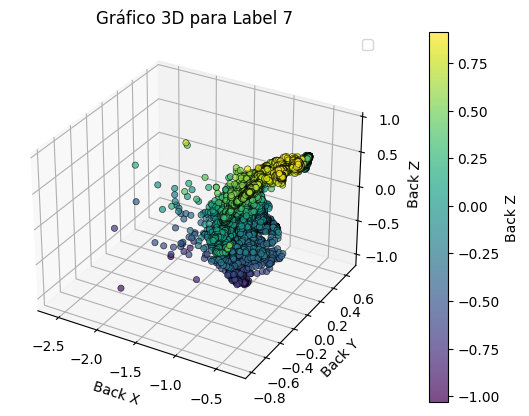

In [ ]:

# Filtrar el DataFrame para obtener solo las filas donde 'label' es igual a 1
filtered_df = df[df['label'] == 7]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Establecer una colormap basada en 'back_z'
cmap = plt.get_cmap('viridis')

# Normalizar 'back_z' para asignar colores
norm = plt.Normalize(filtered_df['back_z'].min(), filtered_df['back_z'].max())

# Trazar un gráfico 3D con 'back_x', 'back_y' y 'back_z', y colores basados en 'back_z'
scatter = ax.scatter(
    filtered_df['back_x'],
    filtered_df['back_y'],
    filtered_df['back_z'],
    c=filtered_df['back_z'],
    cmap=cmap,
    norm=norm,
    marker='o',
    alpha=0.7,  # Transparencia
    edgecolors='black',  # Contorno negro
    linewidths=0.5,  # Ancho del contorno
)

# Añadir una barra de colores
cb = plt.colorbar(scatter, ax=ax, pad=0.1)
cb.set_label('Back Z')

# Añadir etiquetas y leyenda
ax.set_xlabel('Back X')
ax.set_ylabel('Back Y')
ax.set_zlabel('Back Z')
ax.legend()
ax.set_title('Gráfico 3D para Label 7 (Sitting)')

# Mostrar el gráfico
plt.show()

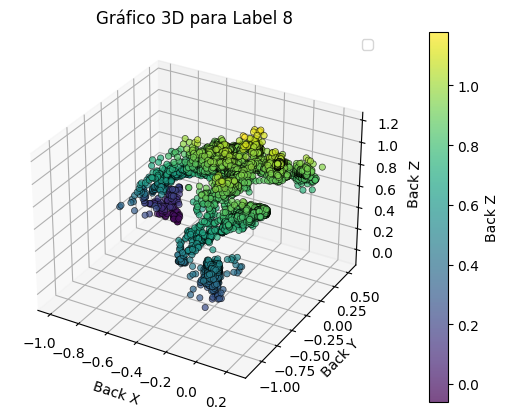

In [ ]:


# Filtrar el DataFrame para obtener solo las filas donde 'label' es igual a 1
filtered_df = df[df['label'] == 8]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Establecer una colormap basada en 'back_z'
cmap = plt.get_cmap('viridis')

# Normalizar 'back_z' para asignar colores
norm = plt.Normalize(filtered_df['back_z'].min(), filtered_df['back_z'].max())

# Trazar un gráfico 3D con 'back_x', 'back_y' y 'back_z', y colores basados en 'back_z'
scatter = ax.scatter(
    filtered_df['back_x'],
    filtered_df['back_y'],
    filtered_df['back_z'],
    c=filtered_df['back_z'],
    cmap=cmap,
    norm=norm,
    marker='o',
    alpha=0.7,  # Transparencia
    edgecolors='black',  # Contorno negro
    linewidths=0.5,  # Ancho del contorno
)

# Añadir una barra de colores
cb = plt.colorbar(scatter, ax=ax, pad=0.1)
cb.set_label('Back Z')

# Añadir etiquetas y leyenda
ax.set_xlabel('Back X')
ax.set_ylabel('Back Y')
ax.set_zlabel('Back Z')
ax.legend()
ax.set_title('Gráfico 3D para Label 8 (Lying)')

# Mostrar el gráfico
plt.show()

## Resultados

Después de realizar todas los pasos necesarios (exploración de los datos, seguido de un submuestreo para empezar a entrenar y probar distintos modelos de clasificación, para al final seleccionar hiperparámetros y encontrar el modelo con las mejores métricas) para encontrar el mejor modelo de clasificación de las clases en la base datos proporcionada, se llegó que al final el mejor modelo encontrado es la combinación del Adaboost y el Random Forest Classifier.